# Notebook 3: Modeling and Evaluation

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier



In [2]:
df = pd.read_csv("../data/data_preprocessed.csv")

In [3]:
df

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,target
0,1.000,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,...,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347,1
1,0.969,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,...,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347,1
2,0.000,0,0,0,0,19.899140,175.850252,0.969,1.78220,10829.0,...,638.0,39.30,76.3,5853.0,4.544,0.868,297.00482,48.134129,15.436,0
3,0.000,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,...,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597,0
4,1.000,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,...,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7988,0.000,0,1,1,0,0.527699,131.705093,1.252,3.22210,1579.2,...,2088.0,4500.53,453.3,5638.0,4.529,0.903,297.18875,47.093819,14.082,0
7989,0.497,0,0,0,0,1.739849,133.001270,0.043,3.11400,48.5,...,1608.0,1585.81,10.6,6119.0,4.444,1.031,286.50937,47.163219,14.757,0
7990,0.021,0,0,1,0,0.681402,132.181750,0.147,0.86500,103.6,...,2218.0,5713.41,12.3,6173.0,4.447,1.041,294.16489,47.176281,15.385,0
7991,0.092,0,0,0,0,333.486169,153.615010,0.214,3.19900,639.1,...,557.0,22.68,14.0,4989.0,2.992,7.824,296.76288,47.145142,10.998,0


In [ ]:
features = [
    'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 
    'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact', 
    'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol',
    'koi_model_snr', 'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec',
    'koi_kepmag'
]

target = "target"

X = df[features].copy()
y = df[target].copy()

## Train/test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

## Feature Scaling

In [6]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=features)


## Logistic Regression Model

Let's start with a basic logistic regression model, where we are going to consider all the features available in the data.

In [38]:
# Fit logistic regression (with class balancing)
log_reg_basic = LogisticRegression(
    max_iter=2000,
    class_weight="balanced",
    solver="lbfgs"
)

log_reg_basic.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [39]:
coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": log_reg_basic.coef_[0]
}).sort_values("coefficient", ascending=False)

coef_df


,feature,coefficient
0,koi_score,1.495694
13,koi_model_snr,0.868098
8,koi_duration,0.185071
18,dec,0.108630
6,koi_time0bk,0.103835
15,koi_slogg,0.003867
17,ra,-0.071788
7,koi_impact,-0.152122
19,koi_kepmag,-0.294607
14,koi_steff,-0.338257


`scikit-learn`'s logistic regression does **not** compute statistical quantities such as the log-likelihood or AIC, so it cannot perform classical stepwise AIC selection.
I initially attempted to replicate the paper’s AIC procedure using `statsmodels`, which supports likelihood-based metrics. However, logistic regression in `statsmodels` is numerically unstable on this dataset due to strong multicollinearity among Kepler stellar and planetary parameters, causing:

* convergence failures
* exponential overflow
* singular matrices

To obtain a stable and reproducible feature selection procedure, I instead use **L1-regularized (LASSO) logistic regression**, which performs automatic feature selection by shrinking non-informative coefficients to zero.
This approach is widely used as a modern alternative to stepwise AIC.

In [47]:
from sklearn.linear_model import LogisticRegressionCV

# L1 logistic regression with cross-validated C
lasso = LogisticRegressionCV(
    cv=5,
    penalty="l1",
    solver="liblinear",
    scoring="accuracy",
    max_iter=5000,
    n_jobs=-1
)

lasso_model = lasso.fit(X_train_scaled, y_train)

# Extract selected features
selected_lasso = X_train_scaled.columns[lasso.coef_[0] != 0].tolist()

print("Features selected by LASSO:")
selected_lasso

Features selected by LASSO:


['koi_score',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_time0bk',
 'koi_impact',
 'koi_duration',
 'koi_depth',
 'koi_prad',
 'koi_teq',
 'koi_insol',
 'koi_model_snr',
 'koi_steff',
 'koi_slogg',
 'koi_srad',
 'ra',
 'dec',
 'koi_kepmag']

`LASSO` selected all the available features making it similar to the baseline Logistic regression. From the paper by Alberto Monaco and Edoardo Gervasoni, they used stepAIC and it returned 18 out of 20 features excluding `koi_insol` and `koi-fpflag_co`. Hence I will be evaluating a model with those features.

In [42]:
paper_features = [col for col in X_train.columns 
                  if col not in ["koi_insol", "koi_fpflag_co"]]

log_reg_paper = LogisticRegression(
    max_iter=2000,
    class_weight="balanced",
    solver="lbfgs"
)

log_reg_paper.fit(X_train_scaled[paper_features], y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"---- {name} ----")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
    print(f"AUC:       {roc_auc_score(y_test, y_proba):.4f}")
    print("\nConfusion Matrix:")
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel().tolist()
    print(confusion_matrix(y_test, y_pred))
    # print(tn, fp, fn, tp)

In [48]:
evaluate_model(lasso_model, X_test_scaled, y_test, name="L1 logistic regression with cross-validated C")

---- L1 logistic regression with cross-validated C ----
Accuracy:  0.8569
Precision: 0.7181
Recall:    0.9560
F1 Score:  0.8201
AUC:       0.9339

Confusion Matrix:
[[1061  256]
 [  30  652]]


In [43]:
evaluate_model(log_reg_basic, X_test_scaled, y_test, name="Baseline Logistic Regression")

---- Baseline Logistic Regression ----
Accuracy:  0.8409
Precision: 0.6896
Recall:    0.9707
F1 Score:  0.8063
AUC:       0.9337

Confusion Matrix:
[[1019  298]
 [  20  662]]


In [44]:
evaluate_model(log_reg_paper, X_test_scaled[paper_features], y_test, name="Paper Feature Logistic Regression")


---- Paper Feature Logistic Regression ----
Accuracy:  0.8399
Precision: 0.6893
Recall:    0.9663
F1 Score:  0.8046
AUC:       0.9326

Confusion Matrix:
[[1020  297]
 [  23  659]]


In [45]:
# Fit Logistic Regression *without* class balancing
log_reg_unbalanced = LogisticRegression(
    max_iter=2000,
    solver="lbfgs"
)

log_reg_unbalanced.fit(X_train_scaled, y_train)

evaluate_model(log_reg_unbalanced, X_test_scaled, y_test, name="Logistic Regression without balancing")

---- Logistic Regression without balancing ----
Accuracy:  0.8569
Precision: 0.7176
Recall:    0.9575
F1 Score:  0.8204
AUC:       0.9344

Confusion Matrix:
[[1060  257]
 [  29  653]]


The primary goal of our linear modeling was to find a stable and effective baseline.

The **plain Logistic Regression model (without class balancing)** emerged as the strongest linear performer, achieving an $\mathbf{F1}$ score of $\mathbf{0.8204}$ and an $\mathbf{AUC}$ of $\mathbf{0.9344}$.

This model, or the nearly identical $\mathbf{L1}$ **(LASSO)** model, serves as our robust **linear benchmark**. Its success confirms that a strong linear relationship exists in the data, but it also establishes a performance ceiling that our subsequent **non-linear models** (Decision Tree, Random Forest, and Neural Network) must surpass.

## Decision Tree

In [54]:
# Define a range of parameters to search
param_grid = {
    # Maximum depth of the tree (prevents very complex trees)
    'max_depth': [5, 10, 15, 20, None], 
    
    # Minimum number of samples required to be at a leaf node
    'min_samples_leaf': [1, 5, 10, 20], 
    
    # Criterion for measuring the quality of a split
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
# cv=5 means 5-fold cross-validation
# scoring='f1' means the best model is chosen based on the F1 score
grid_search = GridSearchCV(
    estimator=dtc, 
    param_grid=param_grid, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1,
    verbose=1
)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 5, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [55]:
# Get the best estimator
dt_best = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5}


In [56]:
evaluate_model(dt_best,X_test_scaled, y_test, name="Decision Tree")

---- Decision Tree ----
Accuracy:  0.9045
Precision: 0.8482
Recall:    0.8768
F1 Score:  0.8623
AUC:       0.9570

Confusion Matrix:
[[1210  107]
 [  84  598]]


The optimized Decision Tree delivered excellent performance, significantly outperforming the linear models with an $\mathbf{F1}$ score of $\mathbf{0.8623}$ and an $\mathbf{AUC}$ of $\mathbf{0.9570}$.

This success confirms that **non-linear modeling is essential** for this dataset. This model sets a new, strong benchmark.

But before we move on lets focus on the the variables importance

          Feature  Importance
0       koi_score    0.691465
13  koi_model_snr    0.196647
10       koi_prad    0.030772
3   koi_fpflag_co    0.018482
7      koi_impact    0.016284
5      koi_period    0.014461
1   koi_fpflag_nt    0.012997
2   koi_fpflag_ss    0.009230
9       koi_depth    0.002894
19     koi_kepmag    0.002033
16       koi_srad    0.001830
8    koi_duration    0.001795
17             ra    0.001110
11        koi_teq    0.000000
4   koi_fpflag_ec    0.000000
6     koi_time0bk    0.000000
15      koi_slogg    0.000000
14      koi_steff    0.000000
12      koi_insol    0.000000
18            dec    0.000000


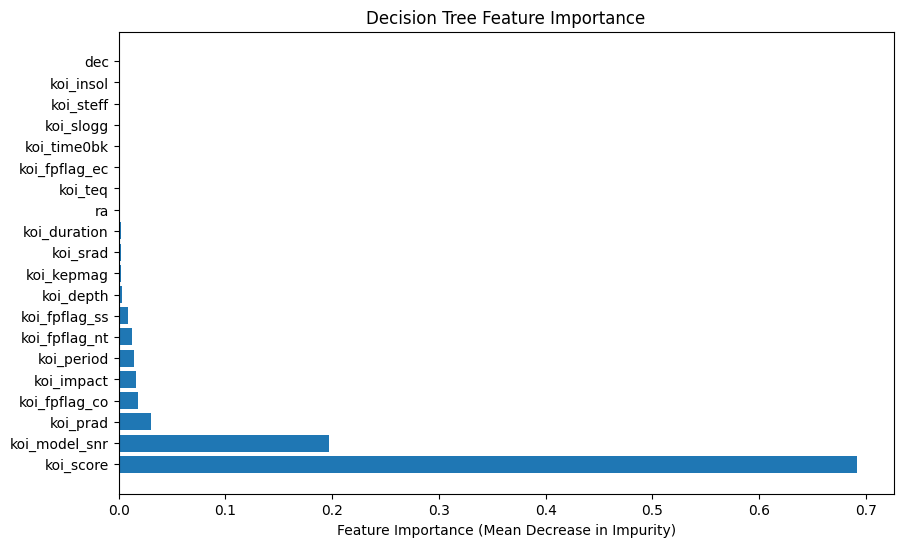

In [57]:
# Get importance scores
importances = dt_best.feature_importances_

# Create a DataFrame for easy visualization
feature_names = X_train_scaled.columns 
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the top features
print(feature_importance_df)

# Visualize the importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance (Mean Decrease in Impurity)")
plt.title("Decision Tree Feature Importance")
plt.show()

7 out of 20 variables are defined as "not important" by the Decision Tree.
In this way, we will carry out a feature selection based on these results

In [58]:
important_features = [
    'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_model_snr', 'koi_srad', 'ra', 'koi_kepmag'
]

X_train_reduced_scaled = X_train_scaled[important_features].copy()
X_test_reduced_scaled = X_test_scaled[important_features].copy()

Let's move on to the **Random Forest** to see if an ensemble of trees can achieve even higher stability and accuracy!

## Random Forest

In [59]:
# Note: The 'max_depth' and 'min_samples_leaf' ranges are smaller since the 
# single Decision Tree already found that a simple tree was optimal.
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 4],
    'max_depth': [5, 10, None],  # Check limited depth and unlimited (None)
    'min_samples_leaf': [1, 5]   # Check no constraint and a slight constraint
}

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(criterion='entropy', random_state=42)

# Initialize GridSearchCV (using F1 score for best model selection)
rf_grid_search = GridSearchCV(
    estimator=rfc, 
    param_grid=rf_param_grid, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1,
    verbose=1
)

# Fit the grid search to your REDUCED training data
rf_grid_search.fit(X_train_reduced_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'max_features': ['sqrt', 4], 'min_samples_leaf': [1, 5], 'n_estimators': [100, 200, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [60]:
# Get the best estimator
rf_best = rf_grid_search.best_estimator_
print(f"Best parameters: {rf_grid_search.best_params_}")

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}


In [61]:
evaluate_model(rf_best, X_test_reduced_scaled, y_test, "Random Forest")

---- Random Forest ----
Accuracy:  0.9185
Precision: 0.8723
Recall:    0.8915
F1 Score:  0.8818
AUC:       0.9736

Confusion Matrix:
[[1228   89]
 [  74  608]]


The optimized Random Forest model, trained on the reduced feature set, is the best performer so far, confirming the value of ensemble learning.

The model achieved the highest scores across the board, setting a new benchmark with an **F1** score of **0.8818** and an excellent **AUC** of **0.9736**. By combining the predictions of **200 individual trees**, the Random Forest significantly improved both Precision (reducing false alarms) and Recall (missing fewer exoplanets) compared to the single Decision Tree.

This powerful, stable ensemble model now sets the highest performance target for the final model: 

## Single Hidden Layer Neural Network.

In [64]:
# Define a range of neurons to test in the single hidden layer
# The size is often between the number of input features (13) and a larger number.
nn_param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (25,), (50,), (100,)], # (X,) means one hidden layer with X neurons
    
    # The solver 'adam' automatically adjusts the learning rate, so we can tune the initial one.
    'learning_rate_init': [0.001, 0.01, 0.1],
    
    # Activation function, ReLU is the modern standard
    'activation': ['relu']
}

# Initialize the MLPClassifier
# max_iter is increased because NNs often require more iterations to converge
nn_base = MLPClassifier(
    solver='adam', 
    max_iter=5000, 
    random_state=42
)

# Initialize GridSearchCV
nn_grid_search = GridSearchCV(
    estimator=nn_base, 
    param_grid=nn_param_grid, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1,
    verbose=1
)

# Fit the grid search to your REDUCED training data
nn_grid_search.fit(X_train_reduced_scaled, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


,estimator,MLPClassifier...ndom_state=42)
,param_grid,"{'activation': ['relu'], 'hidden_layer_sizes': [(5,), (10,), ...], 'learning_rate_init': [0.001, 0.01, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,hidden_layer_sizes,"(10,)"


In [65]:
nn_best = nn_grid_search.best_estimator_
print(f"Best parameters: {nn_grid_search.best_params_}")

Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.001}


In [66]:
evaluate_model(nn_best, X_test_reduced_scaled, y_test, "Single Hidden Layer Neural Network")

---- Single Hidden Layer Neural Network ----
Accuracy:  0.8994
Precision: 0.8177
Recall:    0.9076
F1 Score:  0.8603
AUC:       0.9637

Confusion Matrix:
[[1179  138]
 [  63  619]]


The **Random Forest** remains the top-performing model, demonstrating the best balance between Precision and Recall for the Kepler exoplanet classification task. The neural network confirmed the non-linear nature of the data but couldn't surpass the stability and generalization ability of the ensemble tree method.